# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

# Task 10 - Benchmark different ML models - Solution

In [171]:
# import libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
RSEED=50

In [172]:
# load train the dataset
df_train = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [173]:
# load test the dataset
df_test = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [174]:
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [175]:
# Drop Loan_ID column from train and test datasets
df_train = df_train.drop(columns = ['Loan_ID'])
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [176]:
# Drop Loan_ID column from train and test datasets
df_test = df_test.drop(columns = ['Loan_ID'])
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [177]:
# combining both datasets into one 
df = df_train.append(df_test)
print(df.shape)

(981, 12)


In [178]:
# check datatype and missing values of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [179]:
porc_nan = pd.DataFrame(np.round(df.isna().sum() / len(df) * 100, 3), columns=["porc_nan"])
nan = pd.DataFrame(df.isna().sum(), columns=["nan"])
pd.concat([nan, porc_nan], axis=1)

,nan,porc_nan
Gender,24,2.446
Married,3,0.306
Dependents,25,2.548
Education,0,0.000
Self_Employed,55,5.607
ApplicantIncome,0,0.000
CoapplicantIncome,0,0.000
LoanAmount,27,2.752
Loan_Amount_Term,20,2.039
Credit_History,79,8.053


<AxesSubplot:>

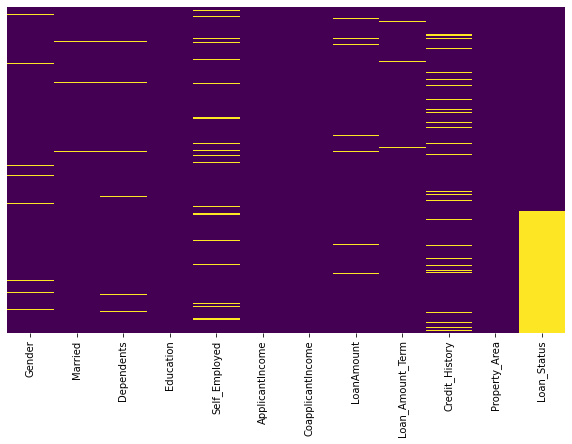

In [180]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [181]:
# handling missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [182]:
imputer = IterativeImputer(max_iter=10, random_state=RSEED)

In [183]:
# From categorical to numeric values - WHOLE DATASET
# Columns: Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
# Dummy variables
'''
    Gender
        1: Female
        0: Male
    Married
        1: Yes
        0: No
    Education
        1: Graduate
        0: Not Graduate
    Self_Employed
        1: Yes
        0: No
    Loan_Status
        1: Y
        0: N
'''
df['Gender'] = df['Gender'].replace({'Female': 1, 'Male': 0})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

df_object = df.select_dtypes(exclude='number')
df_dummy = pd.get_dummies(df_object)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1.0
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1.0


In [184]:
# drop Dependents and Property_Area
df = df.drop(['Dependents', 'Property_Area'], axis=1)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0


In [185]:
# Add dummy variables Dependents and Property_Area
df = pd.concat([df, df_dummy], axis=1)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0,1,0,0,0,0,0,1
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0,1,0,0,1,0,0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,1,0,0,0,0,0,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1,0,0,0,0,0,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1.0,0,1.0,4009,1777.0,113.0,360.0,1.0,NaN,0,0,0,1,0,0,1
363,0.0,1.0,1,0.0,4158,709.0,115.0,360.0,1.0,NaN,1,0,0,0,0,0,1
364,0.0,0.0,1,0.0,3250,1993.0,126.0,360.0,NaN,NaN,1,0,0,0,0,1,0
365,0.0,1.0,1,0.0,5000,2393.0,158.0,360.0,1.0,NaN,1,0,0,0,1,0,0


<AxesSubplot:>

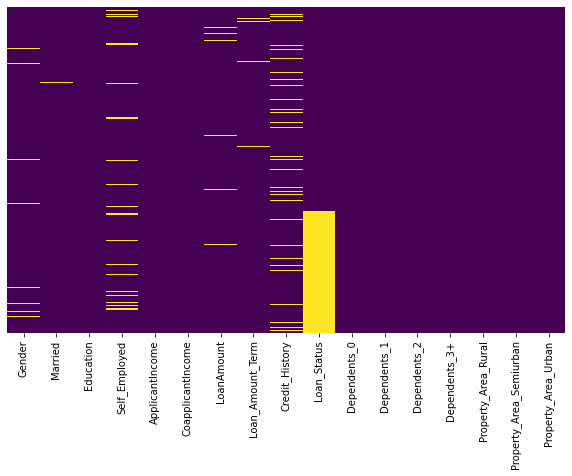

In [186]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [187]:
data = df.values

In [188]:
X = data[:, :-1]
y = data[:, -1]

In [189]:
imputer.fit(X)

IterativeImputer(random_state=50)

In [190]:
X_transform = imputer.transform(X)

In [191]:
print(f"Missing cells: {sum(np.isnan(X).flatten())}")
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

Missing cells: 575
Missing cells: 0


In [192]:
df_object = df.select_dtypes(exclude='number')
df_object

""
0
1
2
3
4
...
362
363
364
365


In [193]:
# From categorical to numeric values - TRAIN DATASET
# Columns: Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
# Dummy variables
'''
    Gender
        1: Female
        0: Male
    Married
        1: Yes
        0: No
    Education
        1: Graduate
        0: Not Graduate
    Self_Employed
        1: Yes
        0: No
    Loan_Status
        1: Y
        0: N
'''
df_train['Gender'] = df_train['Gender'].replace({'Female': 1, 'Male': 0})
df_train['Married'] = df_train['Married'].replace({'Yes': 1, 'No': 0})
df_train['Education'] = df_train['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df_train['Self_Employed'] = df_train['Self_Employed'].replace({'Yes': 1, 'No': 0})
df_train['Loan_Status'] = df_train['Loan_Status'].replace({'Y': 1, 'N': 0})

df_object_train = df_train.select_dtypes(exclude='number')
df_dummy_train = pd.get_dummies(df_object_train)

df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [194]:
# From categorical to numeric values - TEST DATASET
# Columns: Gender, Married, Dependents, Education, Self_Employed, Property_Area
# Dummy variables
'''
    Gender
        1: Female
        0: Male
    Married
        1: Yes
        0: No
    Education
        1: Graduate
        0: Not Graduate
    Self_Employed
        1: Yes
        0: No
'''
df_test['Gender'] = df_test['Gender'].replace({'Female': 1, 'Male': 0})
df_test['Married'] = df_test['Married'].replace({'Yes': 1, 'No': 0})
df_test['Education'] = df_test['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df_test['Self_Employed'] = df_test['Self_Employed'].replace({'Yes': 1, 'No': 0})

df_object_test = df_test.select_dtypes(exclude='number')
df_dummy_test = pd.get_dummies(df_object_test)

df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,Urban
1,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,Urban
2,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,Urban
3,0.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,Urban
4,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,Urban


In [195]:
# drop Dependents and Property_Area
df_train = df_train.drop(['Dependents', 'Property_Area'], axis=1)
df_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1


In [196]:
# Add dummy variables Dependents and Property_Area
df_train = pd.concat([df_train, df_dummy_train], axis=1)
df_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,1
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1,0,0,0,1,0,0
610,0.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,0,0,0,1,1,0,0
611,0.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,0,1,0,0,0,0,1
612,0.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,0,0,1


In [197]:
# drop Dependents and Property_Area
df_test = df_test.drop(['Dependents', 'Property_Area'], axis=1)
df_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,1,1,0.0,5720,0,110.0,360.0,1.0
1,0.0,1,1,0.0,3076,1500,126.0,360.0,1.0
2,0.0,1,1,0.0,5000,1800,208.0,360.0,1.0
3,0.0,1,1,0.0,2340,2546,100.0,360.0,NaN
4,0.0,0,0,0.0,3276,0,78.0,360.0,1.0


In [198]:
# Add dummy variables Dependents and Property_Area
df_test = pd.concat([df_test, df_dummy_test], axis=1)
df_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1,1,0.0,5720,0,110.0,360.0,1.0,1,0,0,0,0,0,1
1,0.0,1,1,0.0,3076,1500,126.0,360.0,1.0,0,1,0,0,0,0,1
2,0.0,1,1,0.0,5000,1800,208.0,360.0,1.0,0,0,1,0,0,0,1
3,0.0,1,1,0.0,2340,2546,100.0,360.0,NaN,0,0,1,0,0,0,1
4,0.0,0,0,0.0,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1,0,1.0,4009,1777,113.0,360.0,1.0,0,0,0,1,0,0,1
363,0.0,1,1,0.0,4158,709,115.0,360.0,1.0,1,0,0,0,0,0,1
364,0.0,0,1,0.0,3250,1993,126.0,360.0,NaN,1,0,0,0,0,1,0
365,0.0,1,1,0.0,5000,2393,158.0,360.0,1.0,1,0,0,0,1,0,0


In [199]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   601 non-null    float64
 1   Married                  611 non-null    float64
 2   Education                614 non-null    int64  
 3   Self_Employed            582 non-null    float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               592 non-null    float64
 7   Loan_Amount_Term         600 non-null    float64
 8   Credit_History           564 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Dependents_0             614 non-null    uint8  
 11  Dependents_1             614 non-null    uint8  
 12  Dependents_2             614 non-null    uint8  
 13  Dependents_3+            614 non-null    uint8  
 14  Property_Area_Rural      6

In [200]:
# Check if all data if numeric 
df_train.select_dtypes(exclude='number')

""
0
1
2
3
4
...
609
610
611
612


In [201]:
# Check if all data if numeric 
df_test.select_dtypes(exclude='number')

""
0
1
2
3
4
...
362
363
364
365


<AxesSubplot:>

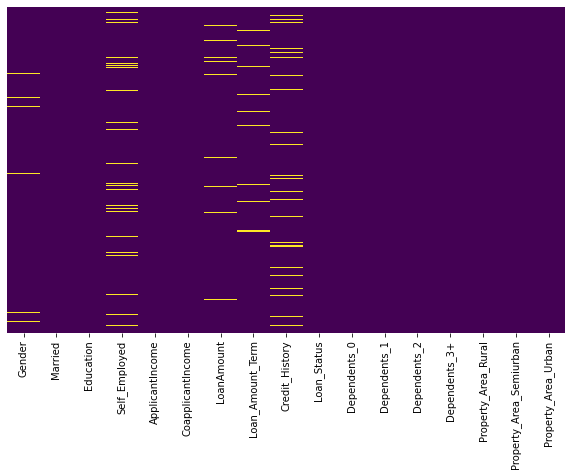

In [202]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

<AxesSubplot:>

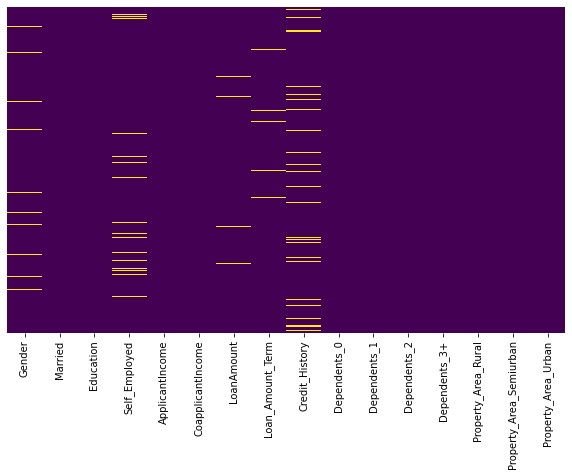

In [203]:
plt.figure(figsize=(10,6))
sns.heatmap(df_test.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [204]:
train_labels = np.array(df_train.pop('Loan_Status'))

In [205]:
data_train = df_train.values
data_test = df_test.values

In [206]:
imputer.fit(data_train)
imputer.fit(data_test)

IterativeImputer(random_state=50)

In [207]:
train_transform = imputer.transform(data_train)
test_transform = imputer.transform(data_test)

In [208]:
print(f"Missing cells: {sum(np.isnan(data_train).flatten())}")
print(f"Missing cells: {sum(np.isnan(train_transform).flatten())}")

Missing cells: 134
Missing cells: 0


In [209]:
print(f"Missing cells: {sum(np.isnan(data_test).flatten())}")
print(f"Missing cells: {sum(np.isnan(test_transform).flatten())}")

Missing cells: 74
Missing cells: 0


# Model Decision Tree

## Split Data into Training and Testing Set

Save 30% for testing

In [210]:
df_test.shape

(367, 16)

In [211]:
df_train.shape

(614, 16)

In [212]:
train_labels.shape

(614,)

In [213]:
from sklearn.model_selection import train_test_split

'''
test = test_transform
# test_labels 
train = train_transform
train_labels
'''

train, test, train_labels, test_labels = train_test_split(train_transform, train_labels, 
                                                          stratify = train_labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)



In [214]:
print(test.shape)
print(train_labels.shape)
print(test_labels.shape)
print(train.shape)

(185, 16)
(429,)
(185,)
(429, 16)


In [225]:
from sklearn.model_selection import GridSearchCV

In [226]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,23,30,40,50,70,90,120,150]}


In [227]:
tree = DecisionTreeClassifier(random_state=RSEED)

In [228]:
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(train, train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 23,
                                       30, 40, 50, 70, 90, 120, 150]})

In [233]:
print(f'Decision tree has {clf.best_params_}')

Decision tree has {'criterion': 'entropy', 'max_depth': 4}


In [234]:
# Make probability predictions
train_probs = clf.predict_proba(train)[:, 1]
probs = clf.predict_proba(test)[:, 1]

train_predictions = clf.predict(train)
predictions = clf.predict(test)

In [235]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
#print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 0.8152668859094359


In [238]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [239]:
results

{'recall': 0.968503937007874,
 'precision': 0.7784810126582279,
 'roc': 0.6825278305729026,
 'accuracy_score': 0.7891891891891892}

# Model KNN

In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [258]:
knn_para = {'n_neighbors': [3, 5, 11, 19], 'weights':['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

In [259]:
gs = GridSearchCV(KNeighborsClassifier(), knn_para, verbose=1, cv=3, n_jobs=-1)

In [260]:
gs.fit(train, train_labels)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [261]:
print(f'KNN has {gs.best_params_}')

KNN has {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


In [262]:
# Make probability predictions
train_probs = gs.predict_proba(train)[:, 1]
probs = gs.predict_proba(test)[:, 1]

train_predictions = gs.predict(train)
predictions = gs.predict(test)

In [263]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.6589425752592967


In [264]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [265]:
results

{'recall': 0.937007874015748,
 'precision': 0.6918604651162791,
 'roc': 0.5116073852837361,
 'accuracy_score': 0.6702702702702703}

# Model Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression

In [267]:
lr_para = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge

In [268]:
gs = GridSearchCV(LogisticRegression(), lr_para, verbose=1, cv=10, n_jobs=-1)

In [269]:
gs.fit(train, train_labels)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


/Users/jjimenez/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jjimenez/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jjimenez/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jjimenez/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [270]:
print(f'Logistic Regression has {gs.best_params_}')

Logistic Regression has {'C': 10.0, 'penalty': 'l2'}


In [271]:
# Make probability predictions
train_probs = gs.predict_proba(train)[:, 1]
probs = gs.predict_proba(test)[:, 1]

train_predictions = gs.predict(train)
predictions = gs.predict(test)

In [272]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.7877055400961295


In [273]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [274]:
results

{'recall': 0.937007874015748,
 'precision': 0.7933333333333333,
 'roc': 0.7012625576975293,
 'accuracy_score': 0.7891891891891892}

# Model SVM

In [275]:
from sklearn.svm import SVC

In [276]:
svm_para = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [281]:
gs = GridSearchCV(SVC(), svm_para, verbose=1, cv=3, n_jobs=-1)

In [282]:
gs.fit(train, train_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')}, verbose=1)

In [283]:
print(f'SVM has {gs.best_params_}')

SVM has {'C': 10, 'kernel': 'linear'}


In [288]:
# Make probability predictions
#train_probs = gs.predict_proba(train, probability=True)[:, 1]
#probs = gs.predict_proba(test, probability=True)[:, 1]

train_predictions = gs.predict(train)
predictions = gs.predict(test)

In [289]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.7877055400961295


In [290]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [291]:
results

{'recall': 0.984251968503937,
 'precision': 0.7668711656441718,
 'roc': 0.6645397773554168,
 'accuracy_score': 0.7837837837837838}

# Model Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [296]:
rf_para = { 
    'n_estimators': [10, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [299]:
gs = GridSearchCV(RandomForestClassifier(), rf_para, verbose=1, cv=2, n_jobs=-1)

In [300]:
gs.fit(train, train_labels)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30]},
             verbose=1)

In [301]:
print(f'Random Forest has {gs.best_params_}')

Random Forest has {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 30}


In [302]:
# Make probability predictions
train_probs = gs.predict_proba(train)[:, 1]
probs = gs.predict_proba(test)[:, 1]

train_predictions = gs.predict(train)
predictions = gs.predict(test)

In [303]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.8971920060713382


In [304]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [305]:
results

{'recall': 0.9606299212598425,
 'precision': 0.7922077922077922,
 'roc': 0.7044528916644041,
 'accuracy_score': 0.8}

# Model XGBoost

In [306]:
from xgboost import XGBClassifier

In [307]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [309]:
clf = GridSearchCV(XGBClassifier(), parameters, n_jobs=5, 
                   cv=3, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [310]:
clf.fit(train, train_labels)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [6], 'min_child_weight': [11],
                         'missing': [-999], 'n_estimators': [5], 'nthread': [4],
                         'objective': ['binary:logistic'], 'seed': [1337],
                         'silent': [1], 'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [313]:
print(f'XGBoost has {clf.best_params_}')

XGBoost has {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


In [318]:
# Make probability predictions
train_probs = clf.predict_proba(train)[:, 1]
probs = clf.predict_proba(test)[:, 1]

train_predictions = clf.predict(train)
predictions = clf.predict(test)

In [319]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.8159246142170504


In [320]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [321]:
results

{'recall': 0.9921259842519685,
 'precision': 0.7159090909090909,
 'roc': 0.5650285093673636,
 'accuracy_score': 0.7243243243243244}